# TASK 3

## TO EXPLORE UNSUPERIVSED MACHINE LEARNING

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### Importing the dataset

In [2]:
data=pd.read_csv('Iris.csv')


In [3]:
data.set_index('Id',inplace=True)

##### To check the missing values

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


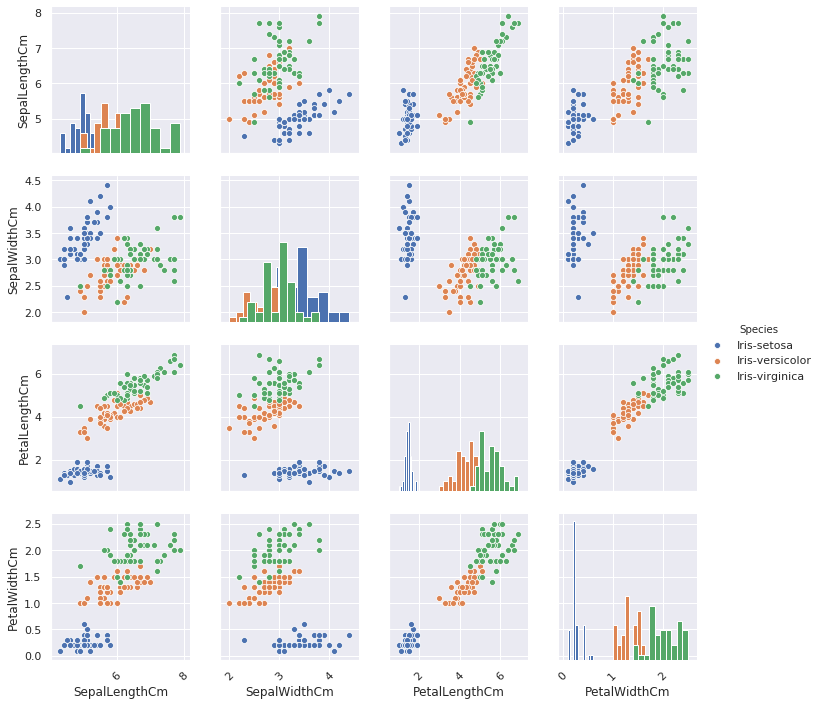

In [5]:
g = sns.pairplot(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm","Species"]], hue="Species", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Visualising the data

#### Sepal length by different species of iris

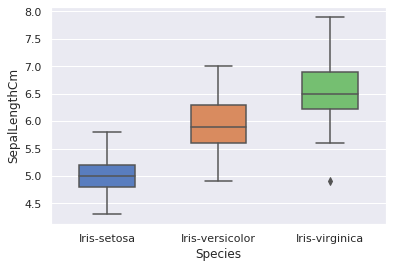

In [7]:
sns.boxplot(x='Species',y="SepalLengthCm",data=data,width=0.5,palette="muted")

#### Sepal width by different species

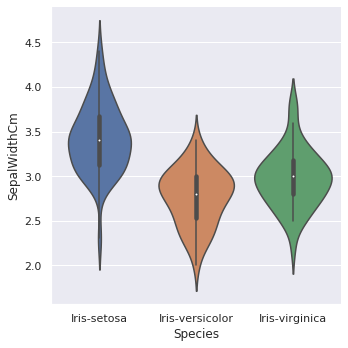

In [8]:
sns.catplot(x="Species",y="SepalWidthCm",kind='violin',data=data)

#### Petal width by different species of iris

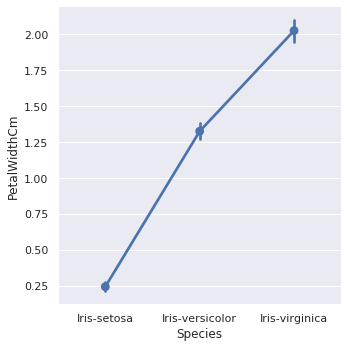

In [9]:
sns.catplot(x='Species',y="PetalWidthCm",kind='point',data=data)

#### Petal Length by different species of iris

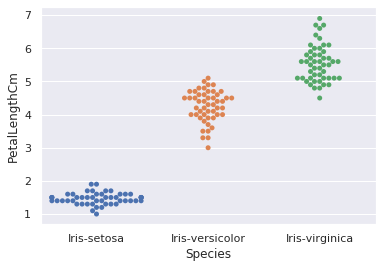

In [10]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)

#### Preprocessing the data

In [11]:
x_attr=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
y_attr=['Species']
x_pipeline=Pipeline([('std_sca',StandardScaler()),])
y_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),])
full_pipeline=ColumnTransformer([("x",x_pipeline,x_attr),("y",y_pipeline,y_attr)])
data_enc=full_pipeline.fit_transform(data)

### Finding the optimum number of clusters

#### Elbow method

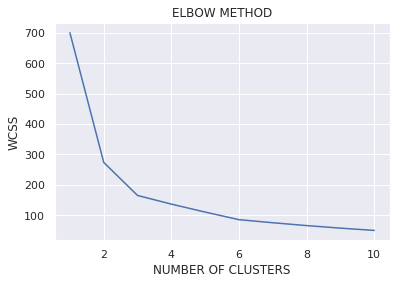

[700.0,
 273.7320057367635,
 165.2254642021395,
 136.76502978877272,
 110.56577457868809,
 85.64981181727528,
 75.5533780857966,
 66.20824097594577,
 57.82554862669822,
 50.33182052577861]

In [12]:
wcss=[]
for i in range(1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=5)
 kmeans.fit(data_enc)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()
wcss

#### Training the datasets/Applying the KMeans

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=5)
cluster_number=kmeans.fit_predict(data_enc)
cluster_number

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

### Visualising the clusters

#### Sepal Length and Sepal Width

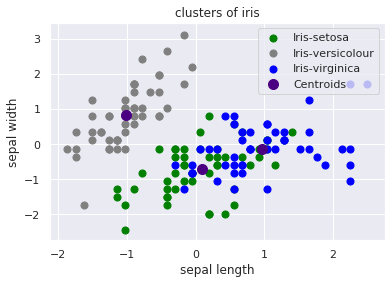

In [14]:
plt.scatter(data_enc[cluster_number == 0, 0], data_enc[cluster_number== 0, 1], s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(data_enc[ cluster_number== 1, 0], data_enc[cluster_number == 1, 1], 
            s = 50, c = 'grey', label = 'Iris-versicolour')
plt.scatter(data_enc[cluster_number == 2, 0], data_enc[cluster_number == 2, 1],
            s = 50, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'indigo', label = 'Centroids')
plt.title('clusters of iris')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

#### Sepal Length and Petal Length

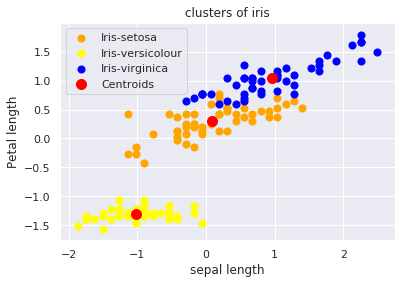

In [15]:
plt.scatter(data_enc[cluster_number == 0, 0], data_enc[cluster_number== 0, 2], s = 50, c = 'orange', label = 'Iris-setosa')
plt.scatter(data_enc[ cluster_number== 1, 0], data_enc[cluster_number == 1, 2], 
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(data_enc[cluster_number == 2, 0], data_enc[cluster_number == 2, 2],
            s = 50, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'red', label = 'Centroids')
plt.title('clusters of iris')
plt.xlabel('sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()

#### Sepal Length and Petal Width

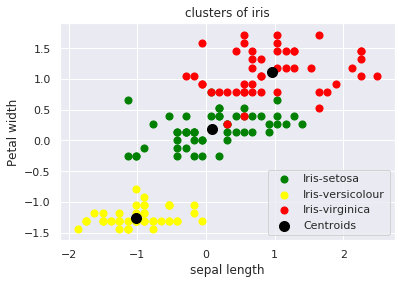

In [16]:
plt.scatter(data_enc[cluster_number == 0, 0], data_enc[cluster_number== 0, 3], s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(data_enc[ cluster_number== 1, 0], data_enc[cluster_number == 1, 3], 
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(data_enc[cluster_number == 2, 0], data_enc[cluster_number == 2, 3],
            s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'black', label = 'Centroids')
plt.title('clusters of iris')
plt.xlabel('sepal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

#### Sepal Width and Petal Length

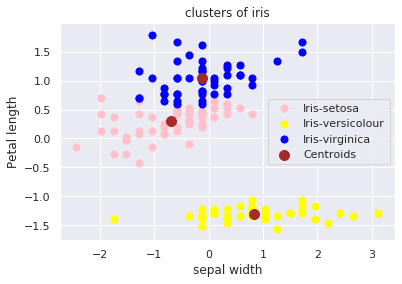

In [17]:
 plt.scatter(data_enc[cluster_number == 0, 1], data_enc[cluster_number== 0, 2], s = 50, c = 'pink', label = 'Iris-setosa')
plt.scatter(data_enc[ cluster_number== 1, 1], data_enc[cluster_number == 1, 2], 
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(data_enc[cluster_number == 2, 1], data_enc[cluster_number == 2, 2],
            s = 50, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'brown', label = 'Centroids')
plt.title('clusters of iris')
plt.xlabel('sepal width')
plt.ylabel('Petal length')
plt.legend()
plt.show()

#### Sepal width and Petal width

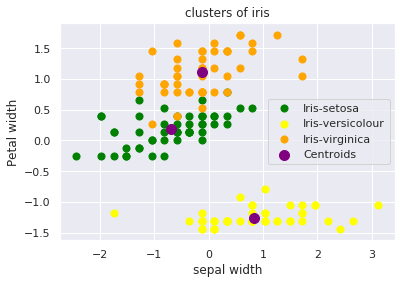

In [18]:
 plt.scatter(data_enc[cluster_number == 0, 1], data_enc[cluster_number== 0, 3], s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(data_enc[ cluster_number== 1, 1], data_enc[cluster_number == 1, 3], 
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(data_enc[cluster_number == 2, 1], data_enc[cluster_number == 2, 3],
            s = 50, c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'purple', label = 'Centroids')
plt.title('clusters of iris')
plt.xlabel('sepal width')
plt.ylabel('Petal width')
plt.legend()
plt.show()

#### Petal Length and Petal width

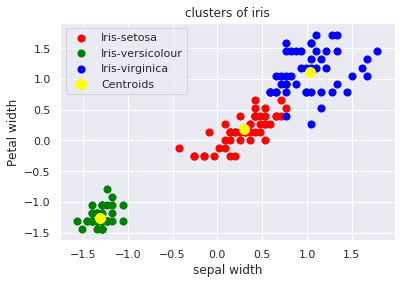

In [19]:
 plt.scatter(data_enc[cluster_number == 0, 2], data_enc[cluster_number== 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(data_enc[ cluster_number== 1, 2], data_enc[cluster_number == 1, 3], 
            s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(data_enc[cluster_number == 2, 2], data_enc[cluster_number == 2, 3],
            s = 50, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('clusters of iris')
plt.xlabel('sepal width')
plt.ylabel('Petal width')
plt.legend()
plt.show()